# Missing Data
created by krohak 2018-01-14

In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp.rename(columns={'Adj Close': symbol}, inplace=True)
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

In [44]:
dates = pd.date_range('2010-01-01', '2010-12-31')
df = get_data(symbols=[],dates=dates)
df.head()

,SPY
2010-01-04,97.788948
2010-01-05,98.047805
2010-01-06,98.116836
2010-01-07,98.531016
2010-01-08,98.858904


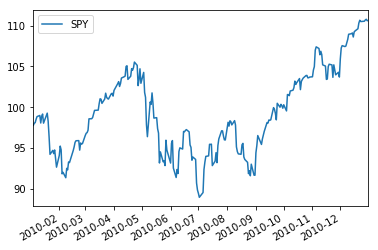

In [45]:
df.plot()
plt.show()

In [52]:
df[0:17]=np.nan
df.iloc[40:90]=np.nan
df.iloc[40:90].head()

,SPY
2010-03-03,NaN
2010-03-04,NaN
2010-03-05,NaN
2010-03-08,NaN
2010-03-09,NaN


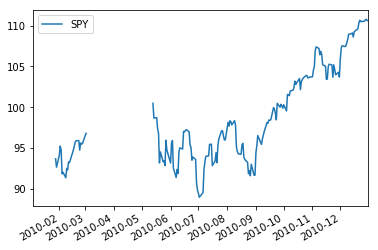

In [53]:
df.plot()
plt.show()

In [54]:
df.fillna(method="ffill",inplace=True)
df.fillna(method="bfill",inplace=True)

In [55]:
df.iloc[40:90].head()

,SPY
2010-03-03,96.813902
2010-03-04,96.813902
2010-03-05,96.813902
2010-03-08,96.813902
2010-03-09,96.813902


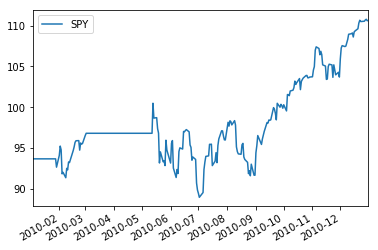

In [56]:
df.plot()
plt.show()